In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads=pd.read_csv('ads.csv')
print(ads)

        id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3       Entertainment     Evening  

In [9]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [10]:
ads.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [11]:
ads.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [3]:
#FILLING IN MISSING VALUES WIHT THEIR MEAN AND MODES.
ads['age']=ads['age'].fillna(ads['age'].mean())
ads['gender']=ads['gender'].fillna(ads['gender'].mode()[0])
ads['device_type']=ads['device_type'].fillna(ads['device_type'].mode()[0])
ads['ad_position']=ads['ad_position'].fillna(ads['ad_position'].mode()[0])
ads['browsing_history']=ads['browsing_history'].fillna(ads['browsing_history'].mode()[0])
ads['time_of_day']=ads['time_of_day'].fillna(ads['time_of_day'].mode()[0])

In [14]:
ads.isnull().sum()

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [34]:
#Removing the outliers from the age columns
#Calculating the first quantile(Q1) and the third quantile(Q3) and then subtract them to 
# get the interquantile Range(IQR)=Q3-Q1
Q1=ads['age'].quantile(0.25)
Q3=ads['age'].quantile(0.75)
interquantile=Q3-Q1


In [35]:
#Defining the bounds for the outliers
lower_bound=Q1-1.5*interquantile
upper_bound=Q3+1.5*interquantile

In [ ]:
#Now, removing the outliers....
without_Outliers=ads[(ads['age']>=lower_bound) & (ads['age']<=upper_bound)]
print(without_Outliers)



In [5]:
ads.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [4]:
ads.groupby('device_type')['click'].value_counts()

device_type  click
Desktop      1        3139
             0        1615
Mobile       1        1678
             0         971
Tablet       1        1683
             0         914
Name: count, dtype: int64

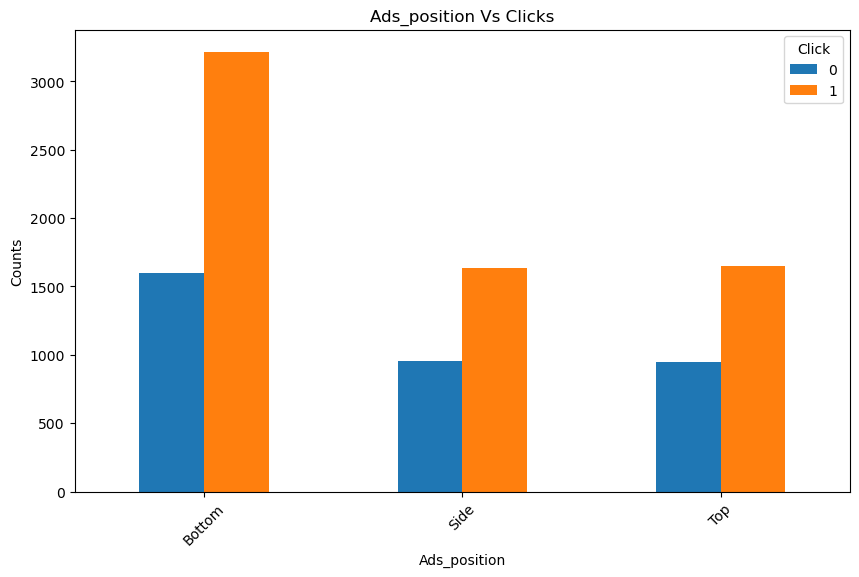

In [38]:
ad_position=ads.groupby('ad_position')['click'].value_counts().unstack(fill_value=0)
ad_position.plot(kind='bar',figsize=(10,6),stacked=False)
plt.title('Ads_position Vs Clicks')
plt.xlabel('Ads_position')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Click')
plt.show()

In [33]:
time=ads.groupby('time_of_day')['click'].value_counts().unstack(fill_value=0)

<Axes: xlabel='time_of_day'>

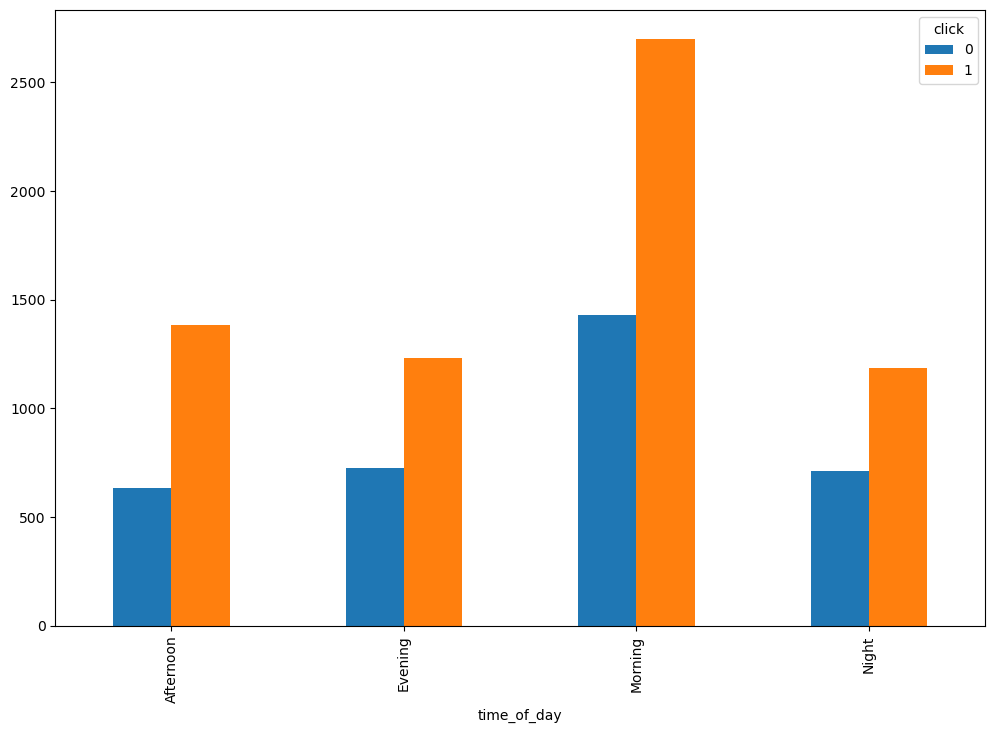

In [36]:
time.plot(kind='bar',figsize=(12,8),stacked=False)

In [9]:
ads.groupby('browsing_history')['click'].value_counts()

browsing_history  click
Education         1         646
                  0         383
Entertainment     1        3972
                  0        1985
News              1         577
                  0         399
Shopping          1         635
                  0         349
Social Media      1         670
                  0         384
Name: count, dtype: int64

In [ ]:
ads.groupby('gender')['click'].value_counts()

gender      click
Female      1        4257
            0        2270
Male        1        1191
            0         619
Non-Binary  1        1052
            0         611
Name: count, dtype: int64

In [11]:
ads.describe()

,id,age,click
count,10000.000000,10000.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,9.496059,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,38.000000,0.000000
50%,5218.000000,40.197363,1.000000
75%,7466.000000,40.197363,1.000000
max,10000.000000,64.000000,1.000000


In [25]:
age_click=ads.iloc[:,[2,8]]
print(age_click)

            age  click
0     22.000000      1
1     40.197363      1
2     41.000000      1
3     34.000000      1
4     39.000000      0
...         ...    ...
9995  40.197363      0
9996  40.197363      0
9997  40.197363      0
9998  40.197363      1
9999  44.000000      0

[10000 rows x 2 columns]


In [18]:
correlation=age_click.corr()
print(correlation)

            age     click
age    1.000000 -0.059733
click -0.059733  1.000000


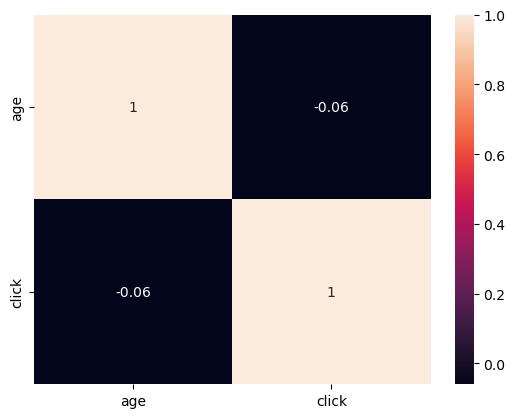

In [21]:
sns.heatmap(correlation,annot=True)
plt.show()